In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
# 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [3]:
sheet_names = pd.ExcelFile(r"C:\Users\ragha\OneDrive\Desktop\Great Learning\GL Practice files\Machine Learning\Election_Data.xlsx").sheet_names

In [4]:
df1 = pd.read_excel(r"C:\Users\ragha\OneDrive\Desktop\Great Learning\GL Practice files\Machine Learning\Election_Data.xlsx", sheet_name=sheet_names[0])
df2 = pd.read_excel(r"C:\Users\ragha\OneDrive\Desktop\Great Learning\GL Practice files\Machine Learning\Election_Data.xlsx", sheet_name=sheet_names[1])


In [5]:
df1_head = df1.head()
df2_head = df2.head()

df1_head, df2_head

(                             **Data Dictionary**
 0                                            NaN
 1  1. vote: Party choice: Conservative or Labour
 2                                            NaN
 3                               2. age: in years
 4                                            NaN,
    Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
 0           1  Labour   43                       3                        3   
 1           2  Labour   36                       4                        4   
 2           3  Labour   35                       4                        4   
 3           4  Labour   24                       4                        2   
 4           5  Labour   41                       2                        2   
 
    Blair  Hague  Europe  political.knowledge  gender  
 0      4      1       2                    2  female  
 1      4      4       5                    2    male  
 2      5      2       3                    2    

In [6]:
df1.dtypes

**Data Dictionary**    object
dtype: object

In [7]:
df2.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [8]:
df1.shape

(18, 1)

In [9]:
df2.shape

(1525, 10)

In [10]:
df2.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
df2.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [12]:
df2.skew()

Unnamed: 0                 0.000000
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [13]:
#Problem 1.2 - 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

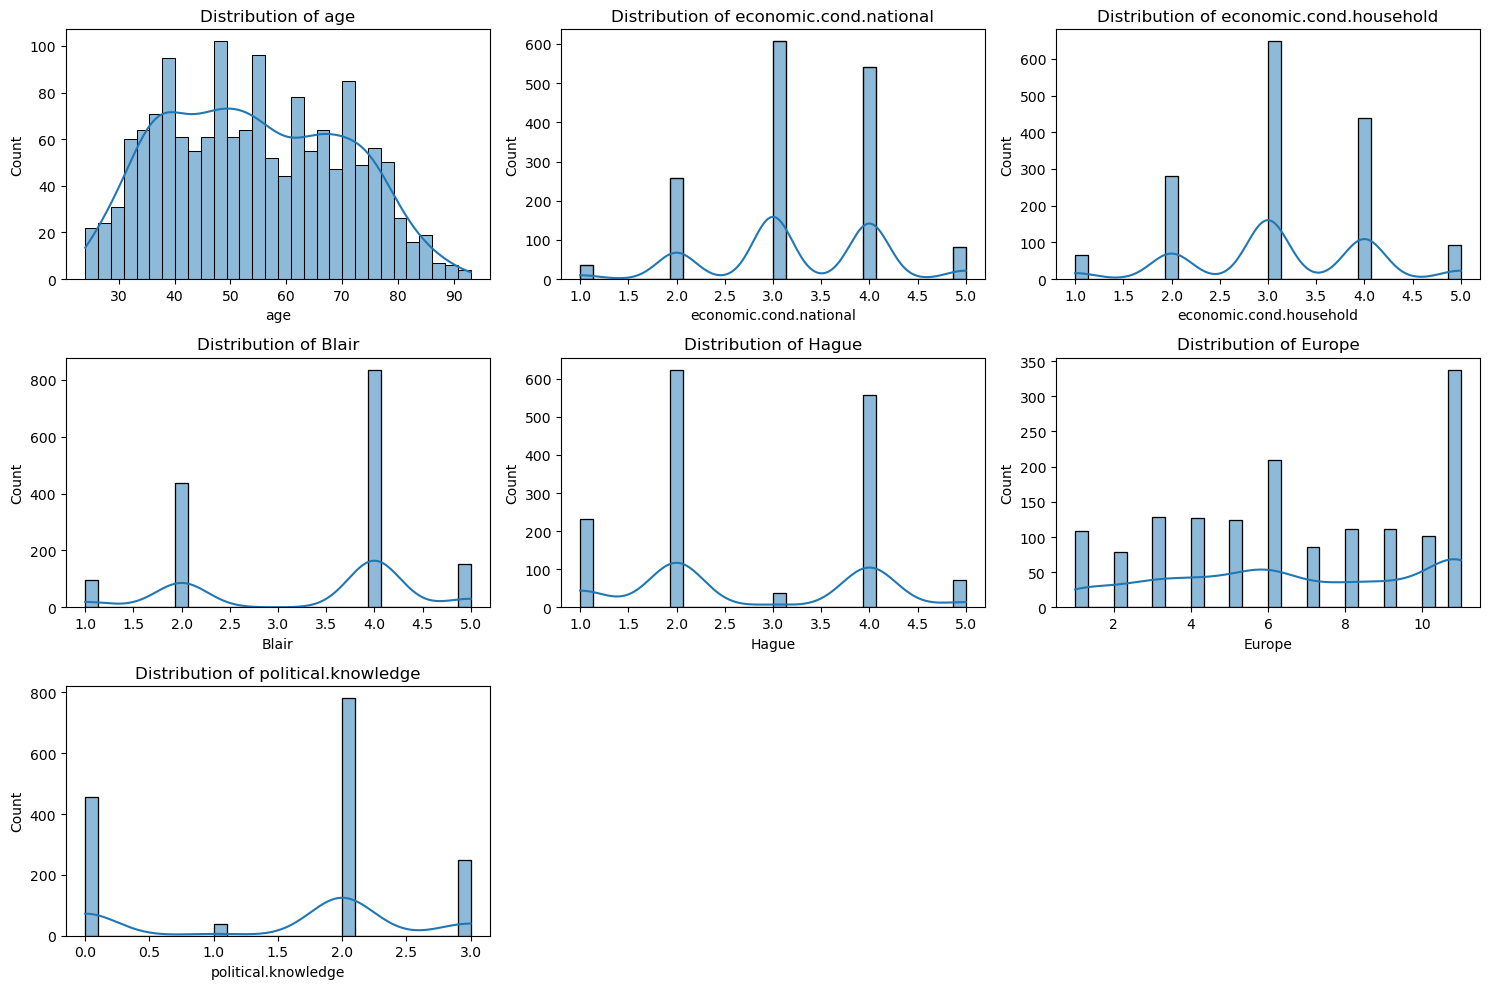

In [14]:
# List of continuous columns for univariate analysis
continuous_columns = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

# Plot distribution plots for the continuous columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df2[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

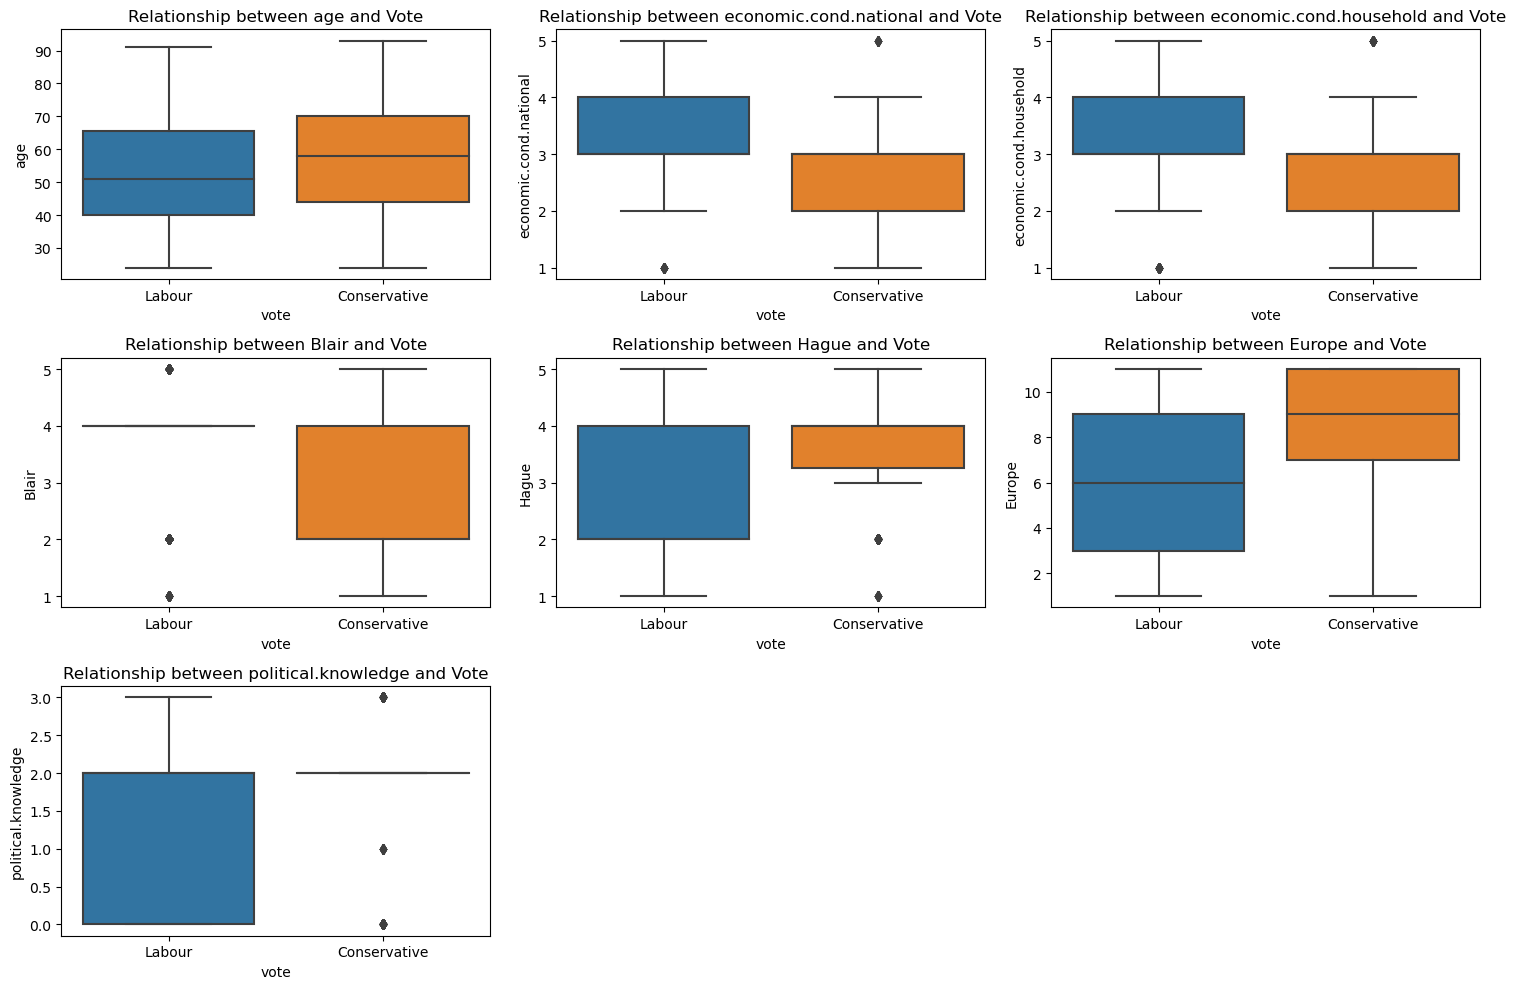

In [15]:
# Bivariate Analysis: Relationship between 'vote' and other features

# Boxplots for continuous variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="vote", y=column, data=df2)
    plt.title(f'Relationship between {column} and Vote')
    plt.tight_layout()

plt.show()

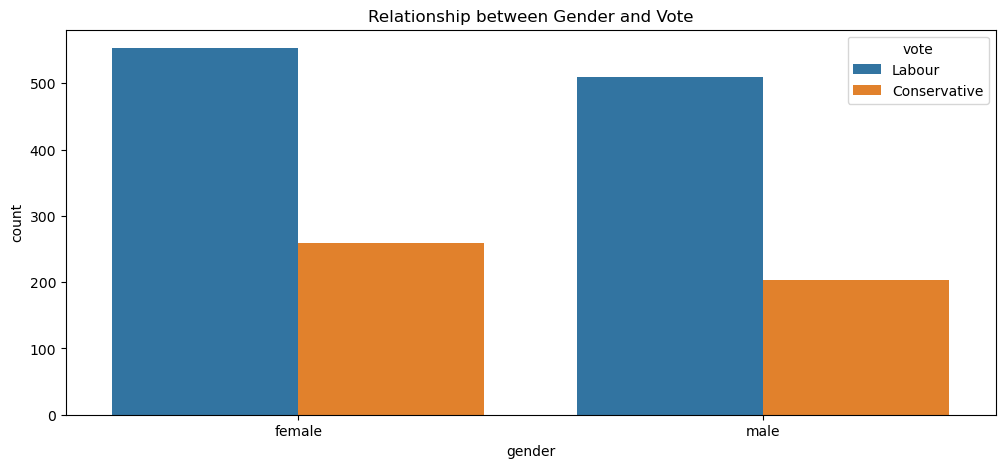

In [16]:
# Count plots for categorical variables
plt.figure(figsize=(12, 5))
sns.countplot(x="gender", hue="vote", data=df2)
plt.title('Relationship between Gender and Vote')
plt.show()

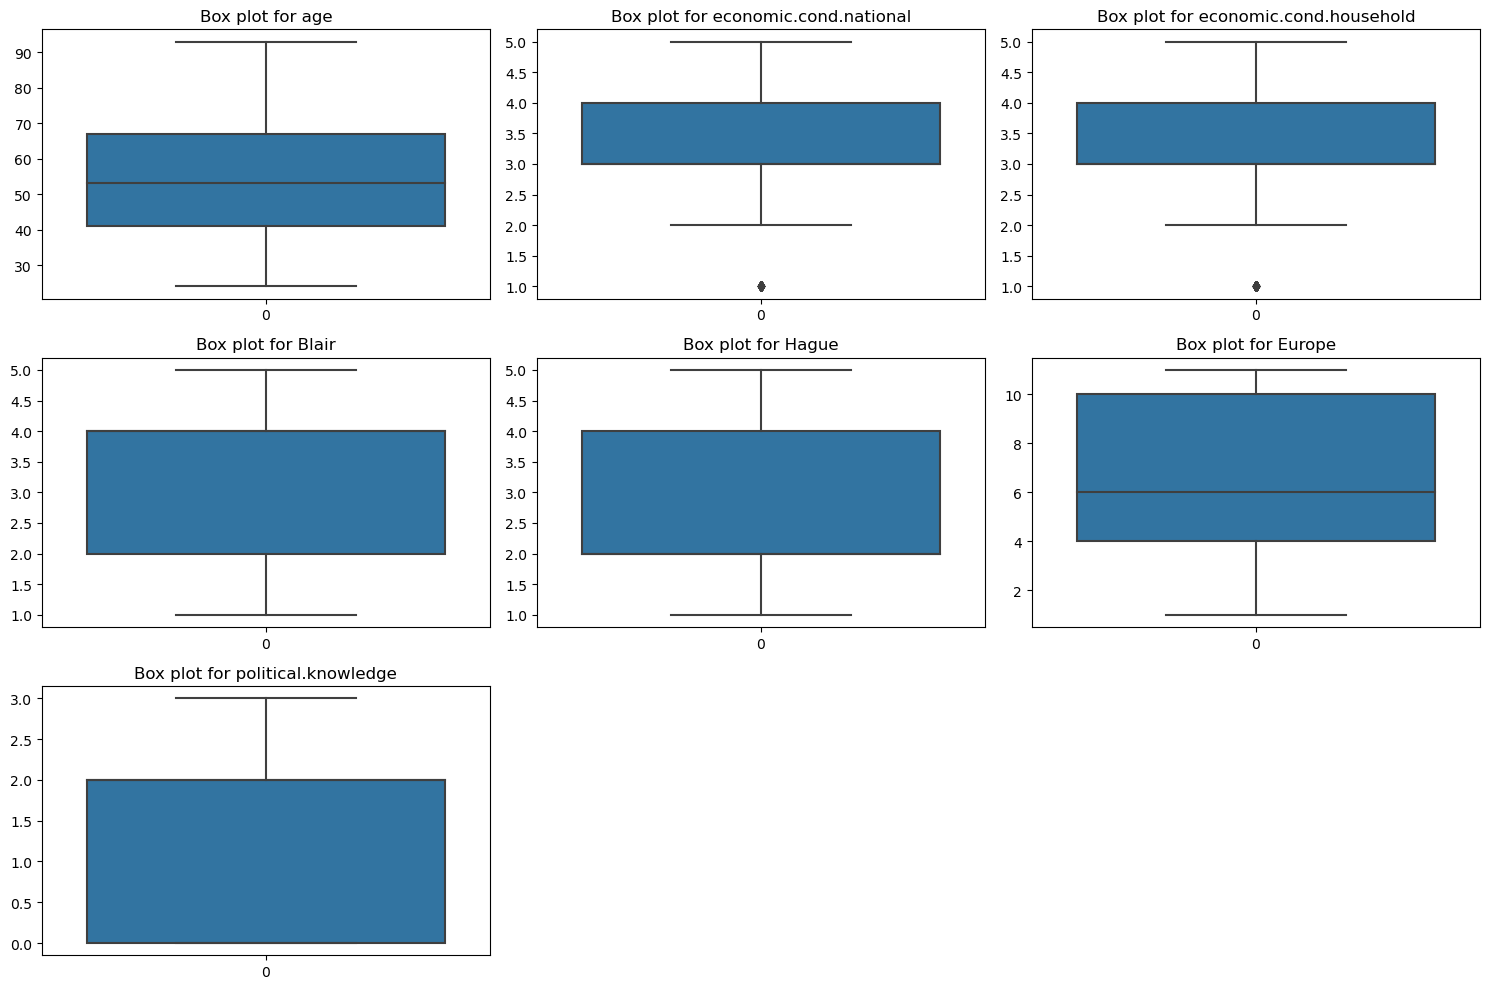

In [17]:
# Check for outliers using box plots for the continuous columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df2[column])
    plt.title(f'Box plot for {column}')
    plt.tight_layout()

plt.show()

In [18]:
# Problem 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [19]:
# Convert 'vote' and 'gender' columns into categorical codes
df2['vote'] = df2['vote'].astype('category').cat.codes
df2['gender'] = df2['gender'].astype('category').cat.codes

# Display the first few rows of the dataset to confirm encoding
df2_encoded_head = df2.head()

df2_encoded_head

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,1,43,3,3,4,1,2,2,0
1,2,1,36,4,4,4,4,5,2,1
2,3,1,35,4,4,5,2,3,2,1
3,4,1,24,4,2,2,1,4,0,0
4,5,1,41,2,2,1,1,6,2,1


In [20]:
# Calculate standard deviation and variance for the features
std_dev = df2.std()
variance = df2.var()

std_dev, variance

(Unnamed: 0                 440.373894
 vote                         0.459685
 age                         15.711209
 economic.cond.national       0.880969
 economic.cond.household      0.929951
 Blair                        1.174824
 Hague                        1.230703
 Europe                       3.297538
 political.knowledge          1.083315
 gender                       0.499109
 dtype: float64,
 Unnamed: 0                 193929.166667
 vote                            0.211310
 age                           246.842075
 economic.cond.national          0.776107
 economic.cond.household         0.864810
 Blair                           1.380212
 Hague                           1.514631
 Europe                         10.873759
 political.knowledge             1.173571
 gender                          0.249110
 dtype: float64)

In [21]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df2.drop(columns=['vote', 'Unnamed: 0'])
y = df2['vote']

# Split the data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1067, 8), (458, 8), (1067,), (458,))

In [22]:
# Problem 1. Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on train and test data
y_train_pred_logreg = log_reg.predict(X_train)
y_test_pred_logreg = log_reg.predict(X_test)

# Calculate train and test accuracies for Logistic Regression
train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)

train_accuracy_logreg, test_accuracy_logreg


(0.8416119962511716, 0.8144104803493449)

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on train and test data
y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)

# Calculate train and test accuracies for LDA
train_accuracy_lda = accuracy_score(y_train, y_train_pred_lda)
test_accuracy_lda = accuracy_score(y_test, y_test_pred_lda)

train_accuracy_lda, test_accuracy_lda

(0.8425492033739457, 0.8122270742358079)

In [25]:
# problem 1.5 Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on train and test data
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Calculate train and test accuracies for KNN
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

train_accuracy_knn, test_accuracy_knn

(0.85941893158388, 0.7729257641921398)

In [27]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on train and test data
y_train_pred_gnb = gnb.predict(X_train)
y_test_pred_gnb = gnb.predict(X_test)

# Calculate train and test accuracies for Gaussian Naïve Bayes
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
test_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)

train_accuracy_gnb, test_accuracy_gnb

(0.837863167760075, 0.8144104803493449)

In [28]:
# Problem 1.6 Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [29]:
from sklearn.model_selection import GridSearchCV

# Parameters for KNN
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize Grid Search for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best parameters for KNN
best_params_knn = grid_search_knn.best_params_
best_params_knn

{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}

In [30]:
# Parameters for Logistic Regression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize Grid Search for Logistic Regression
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

# Best parameters for Logistic Regression
best_params_logreg = grid_search_logreg.best_params_
best_params_logreg

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [31]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Implement Bagging with Decision Tree as the base estimator
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42, n_estimators=100)
bagging.fit(X_train, y_train)

# Predict on train and test data
y_train_pred_bagging = bagging.predict(X_train)
y_test_pred_bagging = bagging.predict(X_test)

# Calculate train and test accuracies for Bagging
train_accuracy_bagging = accuracy_score(y_train, y_train_pred_bagging)
test_accuracy_bagging = accuracy_score(y_test, y_test_pred_bagging)

train_accuracy_bagging, test_accuracy_bagging

(0.9990627928772259, 0.8144104803493449)

In [32]:
# Implement Gradient Boosting
boosting = GradientBoostingClassifier(random_state=42, n_estimators=100)
boosting.fit(X_train, y_train)

# Predict on train and test data
y_train_pred_boosting = boosting.predict(X_train)
y_test_pred_boosting = boosting.predict(X_test)

# Calculate train and test accuracies for Gradient Boosting
train_accuracy_boosting = accuracy_score(y_train, y_train_pred_boosting)
test_accuracy_boosting = accuracy_score(y_test, y_test_pred_boosting)

train_accuracy_boosting, test_accuracy_boosting

(0.8987816307403936, 0.8034934497816594)

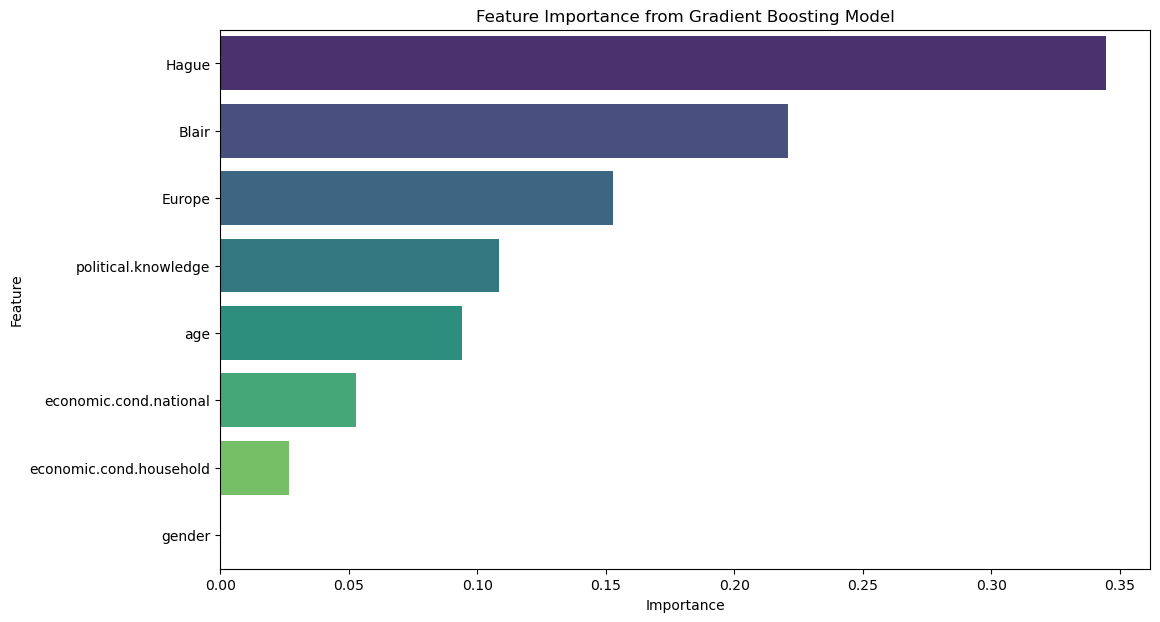

In [33]:
# Extract feature importance from the Gradient Boosting model
feature_importance = boosting.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importance from Gradient Boosting Model')
plt.show()

In [34]:
# Problem 1.7  Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

Performance Metrics for Logistic Regression:

Train Accuracy: 84.16%
Test Accuracy: 81.44%

Train Confusion Matrix:
[[229 100]
 [ 69 669]]

Test Confusion Matrix:
[[ 80  53]
 [ 32 293]]

Train Classification Report:
              precision    recall  f1-score   support

Conservative       0.77      0.70      0.73       329
      Labour       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Test Classification Report:
              precision    recall  f1-score   support

Conservative       0.71      0.60      0.65       133
      Labour       0.85      0.90      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.75      0.76       458
weighted avg       0.81      0.81      0.81       458


Train AUC: 0.8013
Test AUC: 0.7515



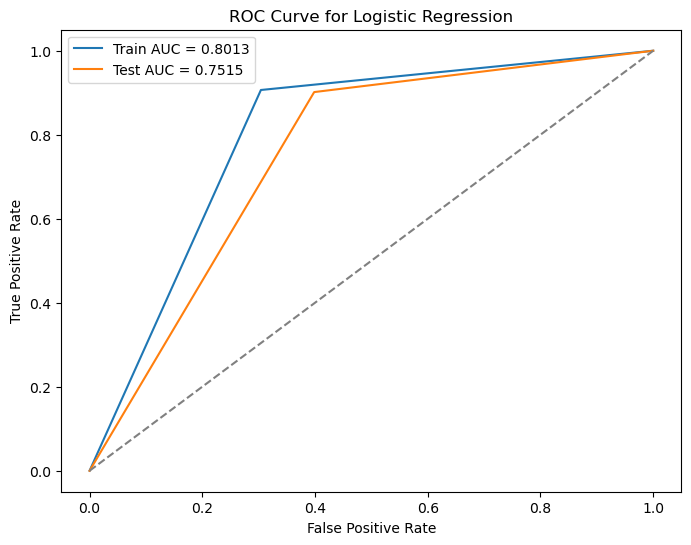

In [35]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# Function to calculate and display performance metrics
def evaluate_model_performance(y_train_true, y_train_pred, y_test_true, y_test_pred, model_name):
    # Accuracy
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    test_accuracy = accuracy_score(y_test_true, y_test_pred)

    # Confusion Matrix
    cm_train = confusion_matrix(y_train_true, y_train_pred)
    cm_test = confusion_matrix(y_test_true, y_test_pred)

    # ROC and AUC
    fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_pred)
    auc_train = roc_auc_score(y_train_true, y_train_pred)
    auc_test = roc_auc_score(y_test_true, y_test_pred)

    # Classification Report
    report_train = classification_report(y_train_true, y_train_pred, target_names=["Conservative", "Labour"])
    report_test = classification_report(y_test_true, y_test_pred, target_names=["Conservative", "Labour"])

    # Display results
    print(f"Performance Metrics for {model_name}:\n")
    print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%\n")
    
    print("Train Confusion Matrix:")
    print(cm_train)
    print("\nTest Confusion Matrix:")
    print(cm_test)
    
    print("\nTrain Classification Report:")
    print(report_train)
    
    print("\nTest Classification Report:")
    print(report_test)
    
    print(f"\nTrain AUC: {auc_train:.4f}")
    print(f"Test AUC: {auc_test:.4f}\n")
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.4f}")
    plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.4f}")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend()
    plt.show()

# Evaluate Logistic Regression model
evaluate_model_performance(y_train, y_train_pred_logreg, y_test, y_test_pred_logreg, "Logistic Regression")


Performance Metrics for Linear Discriminant Analysis (LDA):

Train Accuracy: 84.25%
Test Accuracy: 81.22%

Train Confusion Matrix:
[[229 100]
 [ 68 670]]

Test Confusion Matrix:
[[ 84  49]
 [ 37 288]]

Train Classification Report:
              precision    recall  f1-score   support

Conservative       0.77      0.70      0.73       329
      Labour       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Test Classification Report:
              precision    recall  f1-score   support

Conservative       0.69      0.63      0.66       133
      Labour       0.85      0.89      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.77       458
weighted avg       0.81      0.81      0.81       458


Train AUC: 0.8020
Test AUC: 0.7589



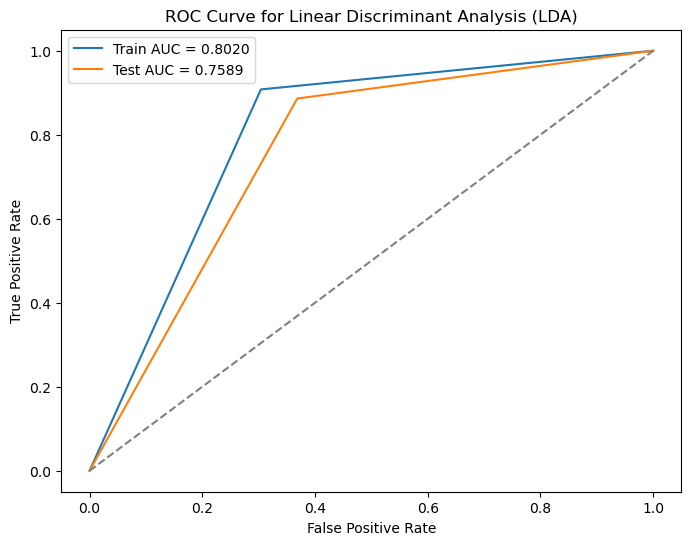

In [36]:
# Evaluate LDA model
evaluate_model_performance(y_train, y_train_pred_lda, y_test, y_test_pred_lda, "Linear Discriminant Analysis (LDA)")

Performance Metrics for K-Nearest Neighbors (KNN):

Train Accuracy: 85.94%
Test Accuracy: 77.29%

Train Confusion Matrix:
[[238  91]
 [ 59 679]]

Test Confusion Matrix:
[[ 77  56]
 [ 48 277]]

Train Classification Report:
              precision    recall  f1-score   support

Conservative       0.80      0.72      0.76       329
      Labour       0.88      0.92      0.90       738

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067


Test Classification Report:
              precision    recall  f1-score   support

Conservative       0.62      0.58      0.60       133
      Labour       0.83      0.85      0.84       325

    accuracy                           0.77       458
   macro avg       0.72      0.72      0.72       458
weighted avg       0.77      0.77      0.77       458


Train AUC: 0.8217
Test AUC: 0.7156



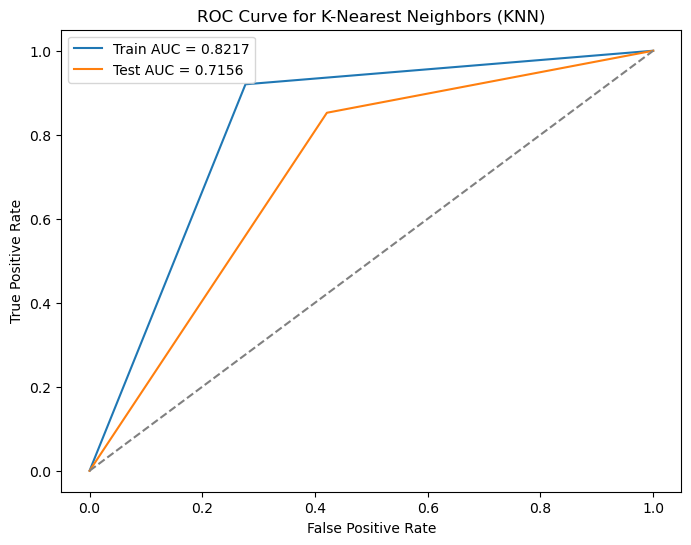

In [37]:
# Evaluate KNN model
evaluate_model_performance(y_train, y_train_pred_knn, y_test, y_test_pred_knn, "K-Nearest Neighbors (KNN)")

Performance Metrics for Gaussian Naïve Bayes:

Train Accuracy: 83.79%
Test Accuracy: 81.44%

Train Confusion Matrix:
[[237  92]
 [ 81 657]]

Test Confusion Matrix:
[[ 87  46]
 [ 39 286]]

Train Classification Report:
              precision    recall  f1-score   support

Conservative       0.75      0.72      0.73       329
      Labour       0.88      0.89      0.88       738

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Test Classification Report:
              precision    recall  f1-score   support

Conservative       0.69      0.65      0.67       133
      Labour       0.86      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458


Train AUC: 0.8053
Test AUC: 0.7671



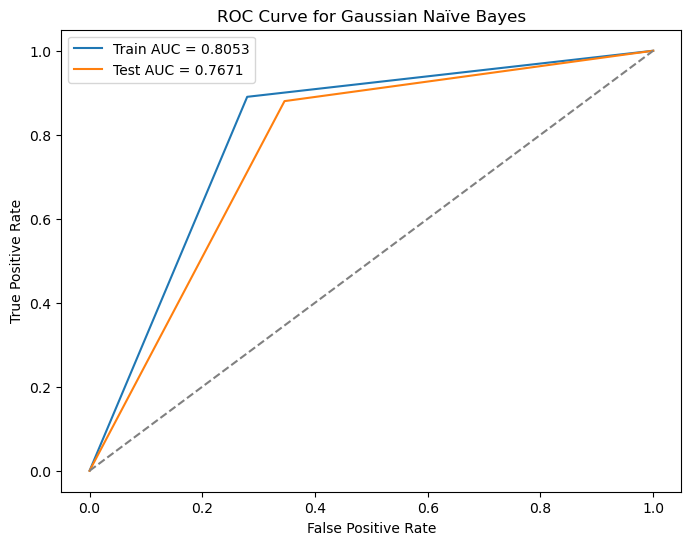

In [38]:
# Evaluate Gaussian Naïve Bayes model
evaluate_model_performance(y_train, y_train_pred_gnb, y_test, y_test_pred_gnb, "Gaussian Naïve Bayes")

Performance Metrics for Bagging (Decision Tree):

Train Accuracy: 99.91%
Test Accuracy: 81.44%

Train Confusion Matrix:
[[328   1]
 [  0 738]]

Test Confusion Matrix:
[[ 90  43]
 [ 42 283]]

Train Classification Report:
              precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       329
      Labour       1.00      1.00      1.00       738

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067


Test Classification Report:
              precision    recall  f1-score   support

Conservative       0.68      0.68      0.68       133
      Labour       0.87      0.87      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458


Train AUC: 0.9985
Test AUC: 0.7737



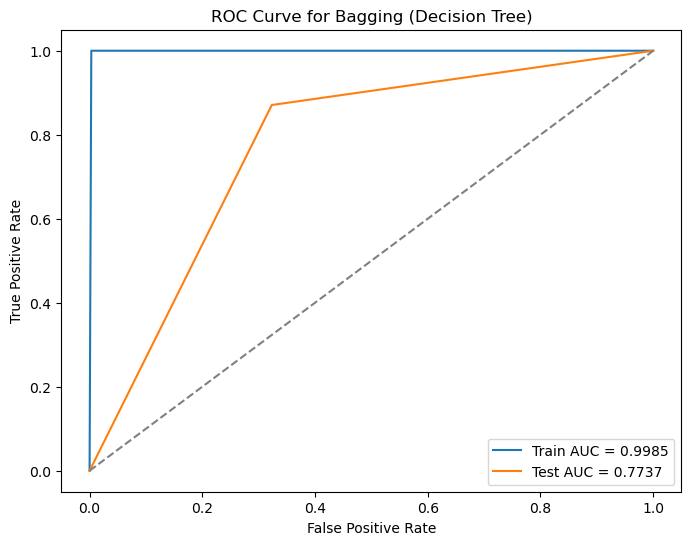

In [39]:
# Evaluate Bagging model
evaluate_model_performance(y_train, y_train_pred_bagging, y_test, y_test_pred_bagging, "Bagging (Decision Tree)")

Performance Metrics for Gradient Boosting:

Train Accuracy: 89.88%
Test Accuracy: 80.35%

Train Confusion Matrix:
[[262  67]
 [ 41 697]]

Test Confusion Matrix:
[[ 85  48]
 [ 42 283]]

Train Classification Report:
              precision    recall  f1-score   support

Conservative       0.86      0.80      0.83       329
      Labour       0.91      0.94      0.93       738

    accuracy                           0.90      1067
   macro avg       0.89      0.87      0.88      1067
weighted avg       0.90      0.90      0.90      1067


Test Classification Report:
              precision    recall  f1-score   support

Conservative       0.67      0.64      0.65       133
      Labour       0.85      0.87      0.86       325

    accuracy                           0.80       458
   macro avg       0.76      0.75      0.76       458
weighted avg       0.80      0.80      0.80       458


Train AUC: 0.8704
Test AUC: 0.7549



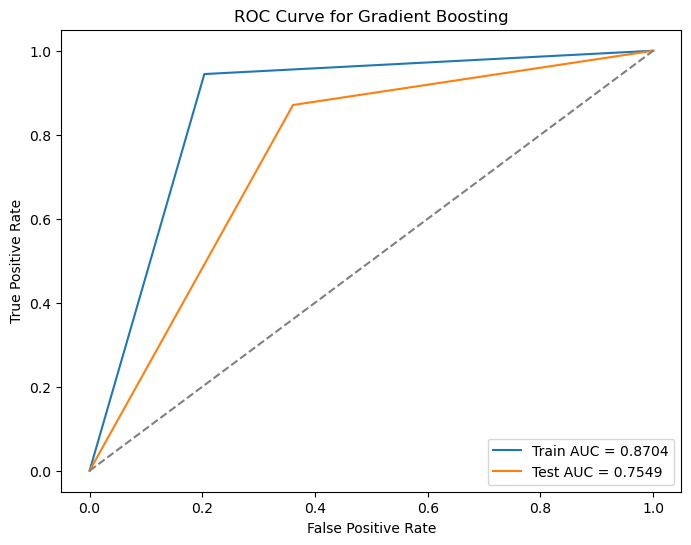

In [40]:
# Evaluate Gradient Boosting model
evaluate_model_performance(y_train, y_train_pred_boosting, y_test, y_test_pred_boosting, "Gradient Boosting")

In [41]:
# Compile model performance metrics into a DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'LDA', 'KNN', 'Gaussian Naïve Bayes', 'Bagging', 'Gradient Boosting'],
    'Train Accuracy': [
        train_accuracy_logreg, train_accuracy_lda, train_accuracy_knn, 
        train_accuracy_gnb, train_accuracy_bagging, train_accuracy_boosting
    ],
    'Test Accuracy': [
        test_accuracy_logreg, test_accuracy_lda, test_accuracy_knn, 
        test_accuracy_gnb, test_accuracy_bagging, test_accuracy_boosting
    ],
    'Train AUC': [
        roc_auc_score(y_train, y_train_pred_logreg), roc_auc_score(y_train, y_train_pred_lda), roc_auc_score(y_train, y_train_pred_knn),
        roc_auc_score(y_train, y_train_pred_gnb), roc_auc_score(y_train, y_train_pred_bagging), roc_auc_score(y_train, y_train_pred_boosting)
    ],
    'Test AUC': [
        roc_auc_score(y_test, y_test_pred_logreg), roc_auc_score(y_test, y_test_pred_lda), roc_auc_score(y_test, y_test_pred_knn),
        roc_auc_score(y_test, y_test_pred_gnb), roc_auc_score(y_test, y_test_pred_bagging), roc_auc_score(y_test, y_test_pred_boosting)
    ]
})

# Display the model comparison table
model_comparison.sort_values(by='Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Accuracy,Train AUC,Test AUC
0,Logistic Regression,0.841612,0.814410,0.801276,0.751521
3,Gaussian Naïve Bayes,0.837863,0.814410,0.805304,0.767068
4,Bagging,0.999063,0.814410,0.998480,0.773730
1,LDA,0.842549,0.812227,0.801954,0.758866
5,Gradient Boosting,0.898782,0.803493,0.870399,0.754933
2,KNN,0.859419,0.772926,0.821729,0.715628


In [42]:
# Problem 1.8 - Insights and Recommendations:

In [43]:
# Influence of Political Figures: 'Blair' and 'Hague' are the most significant features influencing voting decisions. This indicates that the perception of these political figures has a substantial impact on voting choices.
# Age Matters: Age plays a significant role in voting preference, suggesting generational differences in political views.
# Economic Conditions: Both national and household economic conditions moderately influence voting decisions. It implies that voters are influenced both by the broader national economic perspective and their personal financial situations.
# Stance on Europe: Europe's stance is also a determining factor in voting decisions, highlighting the importance of foreign relations and policies related to Europe.

In [44]:
# Focus on Key Political Figures: Since 'Blair' and 'Hague' are influential in voting decisions, political campaigns should focus on leveraging the positive aspects of these figures or addressing any negative perceptions around them.
# Address Economic Concerns: Given the importance of national and household economic conditions, political parties should prioritize economic policies in their campaigns. They should communicate effectively on how their policies will benefit both the nation and individual households.
# Engage with Different Age Groups: With age being a significant factor, tailored campaign strategies for different age groups might be effective. Engaging with younger and older voters differently, understanding their concerns, and addressing them could be beneficial.
# Clarify Stance on Europe: Political campaigns should clearly communicate their stance on Europe and detail out any policies or agreements related to it. This will help voters make informed decisions.
# These insights and recommendations are based on the dataset's features and the modeling results. They provide a data-driven perspective on voting behavior and strategies that political campaigns can adopt.